# Predicting stock and stock price index movement using Trend Deterministic Data Preparation and machine learning techniques

**By:Jigar Patel, Sahil Shah, Priyank Thakkar, K Kotecha**
https://www.researchgate.net/publication/265090298_Predicting_stock_and_stock_price_index_movement_using_Trend_Deterministic_Data_Preparation_and_machine_learning_techniques
Published: **2014**

Paper attempts to predict the direction movement of stock/stock prices in the indian stock market.

The study compares four methods of prediction:
- Artificial Neural Network
- Support Vector Machine
- Random Forrest
- naive-Bayes

It also compares the performance of all prediction models between formatting the inputs as stock parameters and as trend deterinistic data. The companies that are used in the paper are Reliance Industries and Infosys Ltd. The application of this paper is on the stocks: CAT and AAPL.


The overall point of this paper appears to be to compare the effacacy of discreet inputs versus trend-deterministic inputs.

## Research and Data Aggregation:
Paper collects data on two high volume stocks and two stock price indicies. The parameters that are collected for the stocks are: 
- 10 Day Simple Moving Average 
- 10 Day Weighted Moving Average
- Momentum
- Stochastic K%
- Stochastic D%
- Relative Strength Index
- Moving Average Convergence Divergence (MACD)
- Larry William’s R%
- A/D (Accumulation/Distribution) Oscillator
- CCI (Commodity Channel Index)

### Extracting Pricing Data for AAPL and CAT: 

In [1]:
# Importing Stock Pricing Methods:
import yfinance as yf
import pandas as pd
import ta
import numpy as np
from sklearn import preprocessing
import math

# Importing plotting packages:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Import data manipulation packages:
import datetime
import time

In [2]:
# Extracting price data:
cat = yf.Ticker("CAT")
aapl = yf.Ticker("AAPL")

cat_ohlc = cat.history(start="2000-01-01")
cat_data = cat.history("CAT", start="2000-01-01")
aapl_data = aapl.history("AAPL", start="2000-01-01")

cat_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,13.429101,13.798709,13.429101,13.693107,5055000,0.0,0.0
2000-01-04,13.693115,14.009922,13.517111,13.517111,6181400,0.0,0.0
2000-01-05,13.517102,14.133116,13.517102,13.833909,6398600,0.0,0.0
2000-01-06,14.238720,14.713931,14.238720,14.537927,5140600,0.0,0.0
2000-01-07,14.854738,15.523553,14.854738,15.013142,6360200,0.0,0.0


### Performing Technical Analysis Calculation for OHLC TimeSeries:
Extracting a following Technical Indicators via the use of TA-Lib:

- 10 Day Simple Moving Average
- 10 Day Weighted Moving Average
- Momentum
- Stochastic K%
- Stochastic D%
- Relative Strength Index
- Moving Average Convergence Divergence (MACD)
- Larry William’s R%
- A/D (Accumulation/Distribution) Oscillator
- CCI (Commodity Channel Index)

In [3]:
# Importing Tecchnical Analysis Libraries:
import talib

In [4]:
# 10 Day Simple Moving Average:
cat_data["10SMA"] = talib.SMA(cat_data["Close"], timeperiod=10)

# 10 Day Weighted Moving Average:
cat_data["10WMA"] = talib.WMA(cat_data["Close"], timeperiod=10)

# Momentum:
cat_data["Momentum"] = talib.MOM(cat_data["Close"], timeperiod=10)

# Fast Stochastic Indicator:
cat_data["%K"], fastd = talib.STOCHF(
    cat_data["High"], cat_data["Low"], cat_data["Close"], fastk_period=14)

# Slow Stochastic Indicator:
cat_data["%D"], slowd = talib.STOCH(
    cat_data["High"], cat_data["Low"], cat_data["Close"], slowk_period=14)

# Relative Strength Index:
cat_data["RSI"] = talib.RSI(cat_data["Close"], timeperiod=14)

# Moving Average Convergence Divergence:
cat_data["MACD"], macdsignal, macdhist = talib.MACD(cat_data["Close"],
                                                    fastperiod=12, slowperiod=26, signalperiod=9)

# Williams Percent Range:
cat_data["R%"] = talib.WILLR(cat_data["High"], cat_data["Low"], cat_data["Close"], timeperiod=14)

# Accumulation/Distribution Oscillator:
cat_data["ADOSC"] = talib.ADOSC(cat_data["High"], cat_data["Low"], cat_data["Close"], cat_data["Volume"])

# Commodity Channel Index:
cat_data["CCI"] = talib.CCI(cat_data["High"], cat_data["Low"], cat_data["Close"])

cat_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,10SMA,10WMA,Momentum,%K,%D,RSI,MACD,R%,ADOSC,CCI
Date,,,,,,,,,,,,,,,,,
2000-01-03,13.429101,13.798709,13.429101,13.693107,5055000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,13.693115,14.009922,13.517111,13.517111,6181400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,13.517102,14.133116,13.517102,13.833909,6398600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,14.238720,14.713931,14.238720,14.537927,5140600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,14.854738,15.523553,14.854738,15.013142,6360200,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-15,219.889999,220.779999,216.259995,219.460007,5055900,0.0,0.0,233.078999,228.042544,-23.299988,12.415571,40.876075,28.600202,-3.171536,-87.584429,-5.431949e+06,-148.713655
2021-06-16,219.009995,219.389999,216.699997,217.160004,4156900,0.0,0.0,230.448999,225.148181,-26.300003,5.017683,37.473008,26.760699,-4.006899,-94.982317,-5.373361e+06,-120.984164
2021-06-17,216.970001,218.270004,207.880005,209.449997,7995300,0.0,0.0,227.009999,221.330181,-34.389999,4.045329,32.675455,21.718008,-5.230767,-95.954671,-6.636050e+06,-128.809087


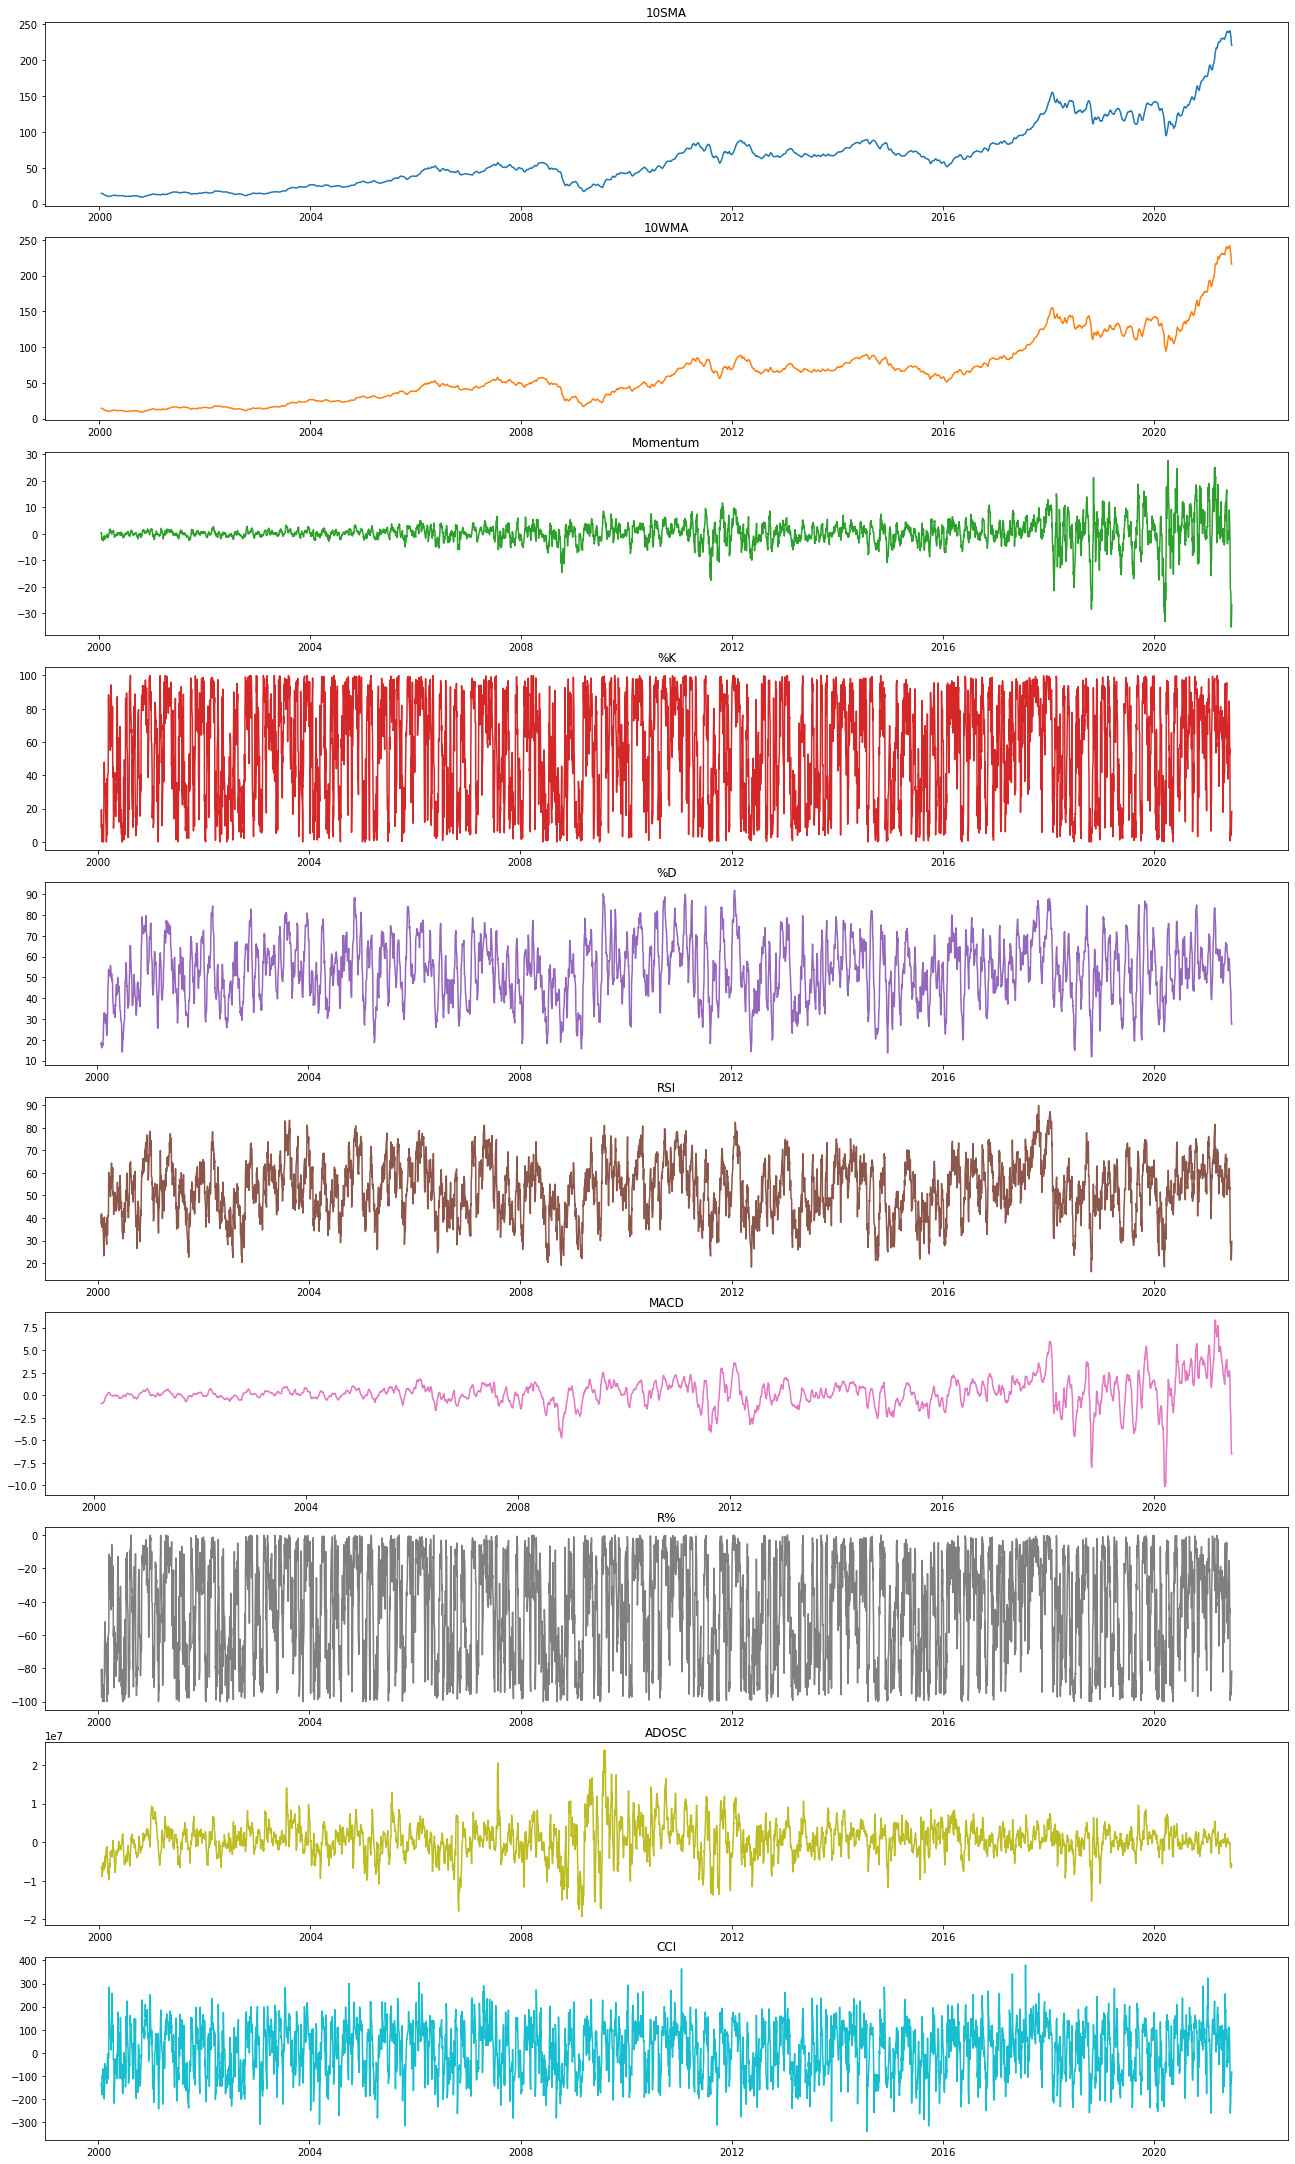

In [5]:
# TA Data:
cols = cat_data.columns[7:] # Technical Indicator Column Names:
colors = plt.rcParams["axes.prop_cycle"]()

# Plotting all Technical Indicators:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(18,30))
fig.tight_layout()

for i in range(0,10):
    c = next(colors)["color"]
    axes[i].plot(cat_data[cols[i]], color=c)
    axes[i].title.set_text(cols[i])

In [6]:
# Re-Normalizing all TA data between [-1, 1]:
ta_cols = ['10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI'] 
# Dataframe of only Technical Indicators:
ta_data = cat_data[ta_cols]

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
x_scaled = min_max_scaler.fit_transform(ta_data)
normalized_ta = pd.DataFrame(x_scaled, columns=ta_cols, index=cat_data.index)

normalized_ta

,10SMA,10WMA,Momentum,%K,%D,RSI,MACD,R%,ADOSC,CCI
Date,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-06-15,0.930671,0.879844,-0.622448,-0.751689,-0.273059,-0.663438,-0.244800,-0.751689,-0.358367,-0.469508
2021-06-16,0.908006,0.855003,-0.717951,-0.899646,-0.358089,-0.713322,-0.335272,-0.899646,-0.355647,-0.392447
2021-06-17,0.878370,0.822234,-0.975488,-0.919093,-0.477962,-0.850069,-0.467821,-0.919093,-0.414257,-0.414192


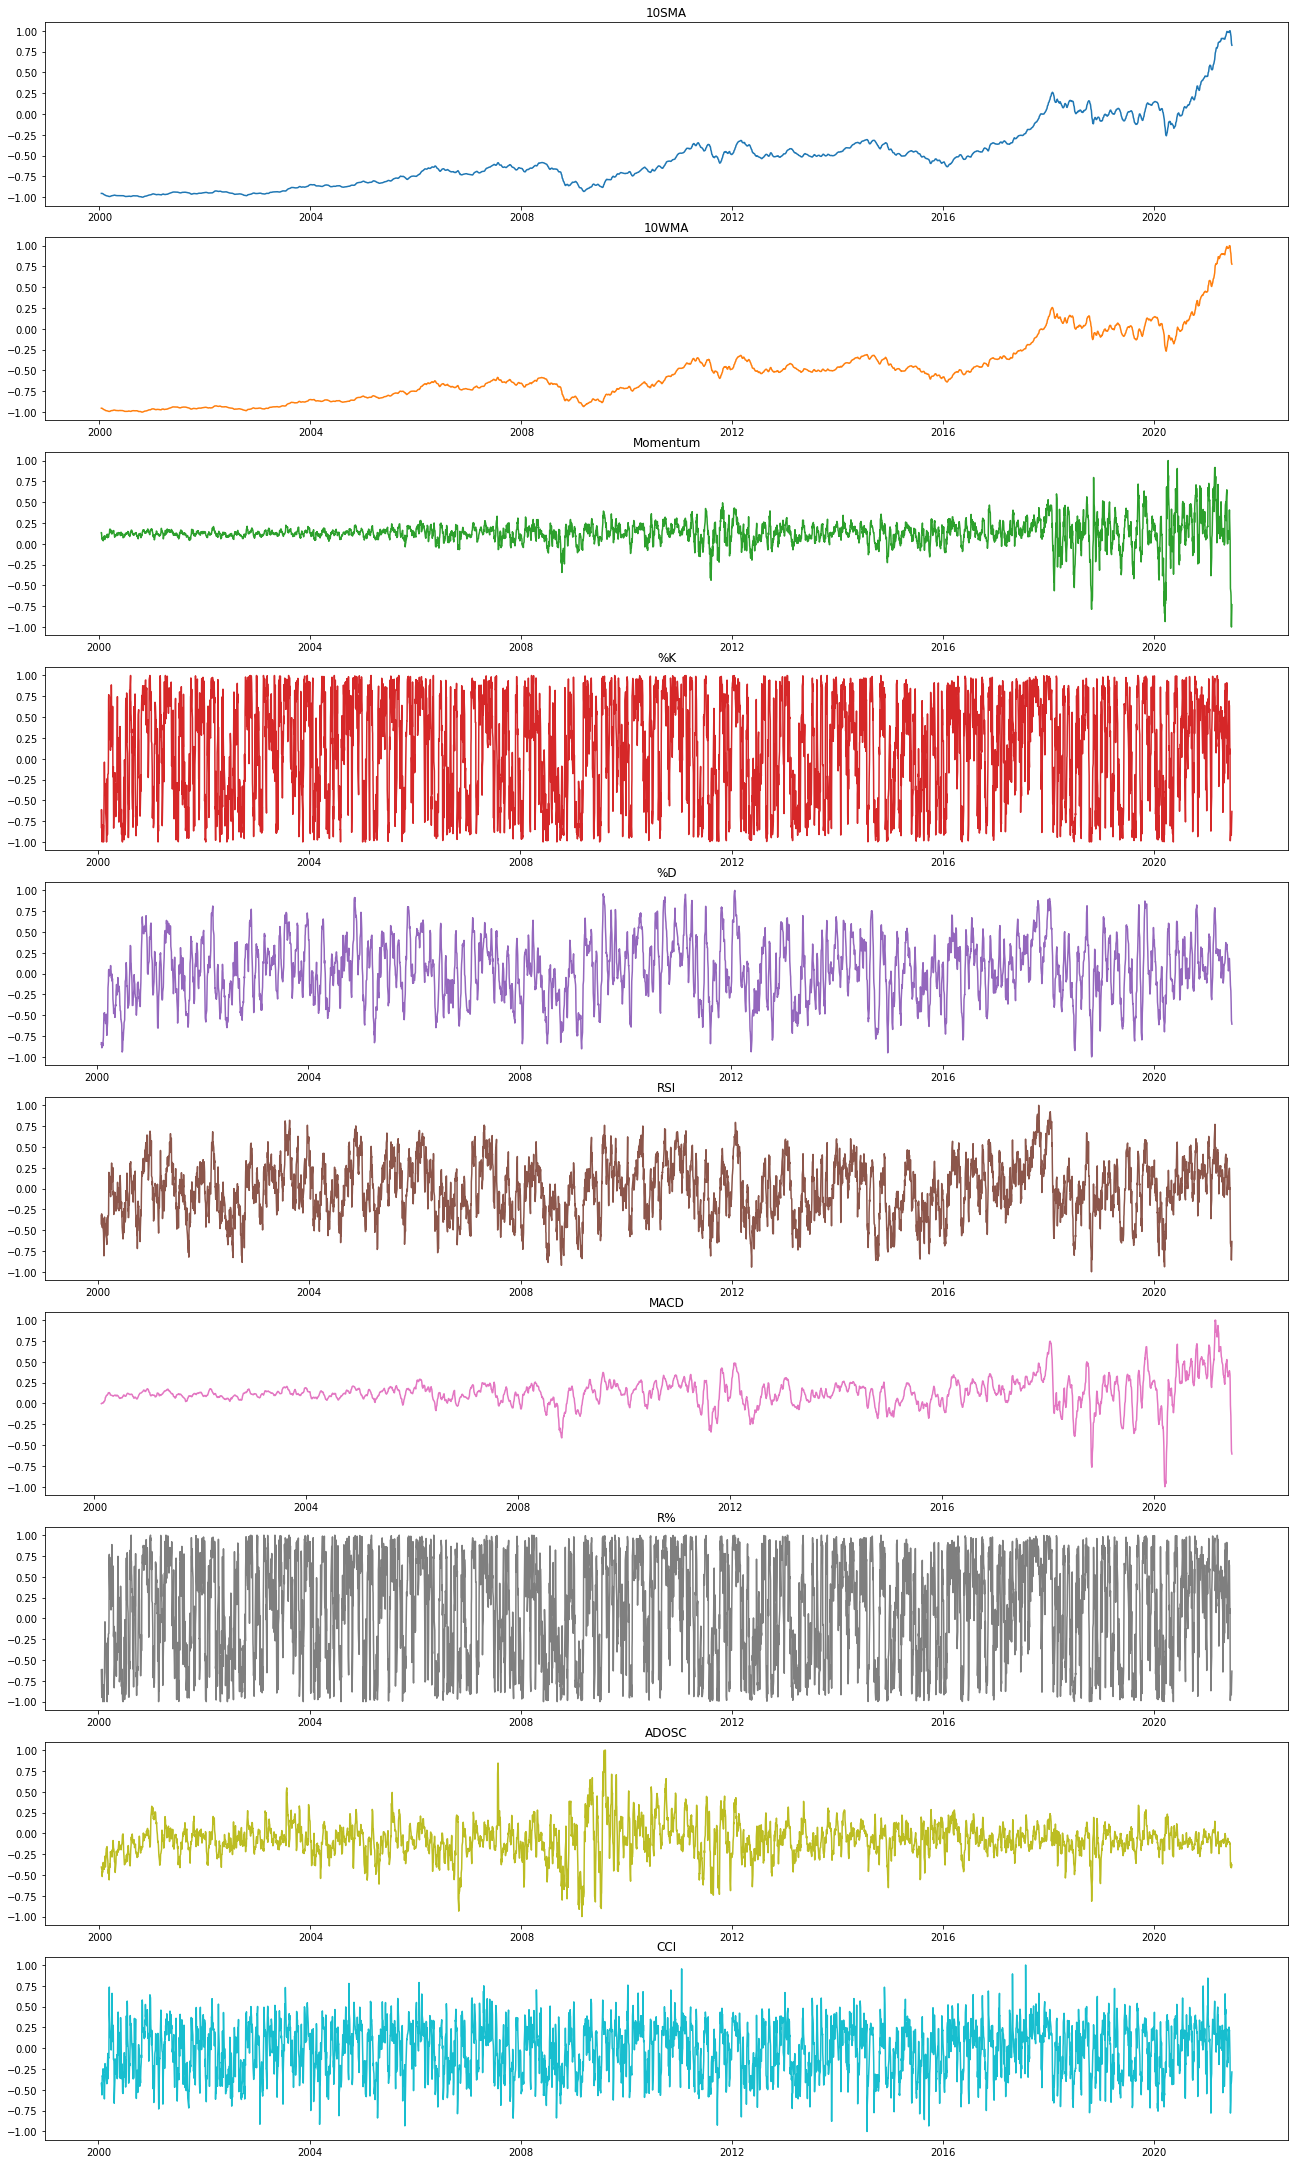

In [7]:
# Plotting normalized data:
# TA Data:
colors = plt.rcParams["axes.prop_cycle"]()

# Plotting all Technical Indicators:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(18,30))
fig.tight_layout()

for i in range(0,10):
    c = next(colors)["color"]
    axes[i].plot(normalized_ta[ta_cols[i]], color=c)
    axes[i].title.set_text(ta_cols[i])

## Trend Deterministic Data Preparation
Creating the Descrete DataFrame from CAT dataset is done by applying the following logic to the price and TA continuous data:

- If the price is above the SMA and WMA then the trend is positive and values of SMA and WMA are +1

- If the STCK%, STCD% and Williams R% values at time t are greater than their respective values at time (t-1) then the value is +1 and vice versa.

- If the value of the MACD at time t is greater than the MACD at time (t-1) the value is +1 and vice versa.

- If the value of RSI is greater than 70 then the value is -1. If it is below 30 it is +1. If it is between 70 and 30 then if at time t the RSI is greater than the value at t-1 then the value is +1 and vice versa. 

- If CCI is greater than 200 the value becomes -1 and if it is below -200 then the value is +1. If it is between 200 and -200 then if its value at time t is greater than the value at (t-1) then the value is +1 and vice versa.

- If the A/D Oscillator at value t is greater than (t-1) the value becomes +1 and vice versa.

- If momentum value is positive then the value is +1 and if the value is negative is -1. 

In [8]:
for row in cat_data.itertuples():
    print(row)
    break

Pandas(Index=Timestamp('2000-01-03 00:00:00'), Open=13.429100739005904, High=13.798709016226251, Low=13.429100739005904, Close=13.693106651306152, Volume=5055000, Dividends=0.0, _7=0.0, _8=nan, _9=nan, Momentum=nan, _11=nan, _12=nan, RSI=nan, MACD=nan, _15=nan, ADOSC=nan, CCI=nan)


In [9]:
# Iterating through the dataframe to format the TA data into discrete data:
counter = 0

for row in cat_data.itertuples():
    
    # Converting Moving Averages to Discrete values:
    """
    If the price is above the SMA and WMA then the trend is positive and values of SMA and WMA
    are +1 and vice versa.
    """
    if math.isnan(row._8) is False:
        if row.Close > row._8:
            cat_data["10SMA"][row.Index] = 1
        else:
            cat_data["10SMA"][row.Index] = -1
    if math.isnan(row._9) is False: 
        if row.Close > row._9:
            cat_data["10WMA"][row.Index] = 1
        else:
            cat_data["10WMA"][row.Index] = -1
    
    """
    If the STCK%, STCD% and Williams R% values at time t are greater than their respective
    values at time (t-1) then the value is +1 and vice versa.
    """
    # STK %K:
    if math.isnan(row._11) is False:
        try:
            if row._11 > cat_data["%K"].iloc[counter-1]:
                cat_data["%K"][row.Index] = 1
            else:
                cat_data["%K"][row.Index] = -1
        except:
            cat_data["%K"][row.Index] = 0
    
    # STC %D:
    if math.isnan(row._12) is False:
        try:
            if row._12 > cat_data["%D"].iloc[counter-1]:
                cat_data["%D"][row.Index] = 1
            else:
                cat_data["%D"][row.Index] = -1
        except:
            cat_data["%D"][row.Index] = 0
    
    # Williams R:
    if math.isnan(row._15) is False:
        try:
            if row._15 > cat_data["R%"].iloc[counter-1]:
                cat_data["R%"][row.Index] = 1
            else:
                cat_data["R%"][row.Index] = -1
        except:
            cat_data["R%"][row.Index] = 0
            
    # MACD:
    """
    If the value of the MACD at time t is greater than the MACD at time (t-1) the 
    value is +1 and vice versa.
    """
    if math.isnan(row.MACD) is False:
        try:
            if row.MACD > cat_data["MACD"].iloc[counter-1]:
                cat_data["MACD"][row.Index] = 1
            else:
                cat_data["MACD"][row.Index] = -1
        except:
            cat_data["MACD"][row.Index] = 0
    
    # RSI:
    """
    If the value of RSI is greater than 70 then the value is -1. If it is below 30 it is +1.
    If it is between 70 and 30 then if at time t the RSI is greater than the value at t-1 
    then the value is +1 and vice versa. 
    """
    if math.isnan(row.RSI) is False:
        try:
            if row.RSI > 70:
                cat_data["RSI"][row.Index] = - 1
            
            elif row.RSI < 30:
                cat_data["RSI"][row.Index] = 1
            
            else:
                if row.RSI > cat_data["RSI"][counter-1]:
                    cat_data["RSI"][row.Index] = 1
                else:
                    cat_data["RSI"][row.Index] = -1
        except:
            cat_data["RSI"][row.Index] = 0         
    
    # CCI:
    """
    If CCI is greater than 200 the value becomes -1 and if it is below -200 then the value is +1.
    If it is between 200 and -200 then if its value at time t is greater than the value at (t-1) then
    the value is +1 and vice versa
    """
    if math.isnan(row.CCI) is False:
        try:
            if row.CCI > 200:
                cat_data["CCI"][row.Index] = -1 
            
            elif row.CCI < -200:
                cat_data["CCI"][row.Index] = 1
            
            else:
                if row.CCI > cat_data["CCI"][counter-1]:
                    cat_data["CCI"][row.Index] = 1
                else:
                    cat_data["CCI"][row.Index] = -1
        except:
            cat_data["CCI"][row.Index] = 0 
            
    # A/D Oscillator:
    """
    If the A/D Oscillator at value t is greater than (t-1) the value becomes +1 and vice versa.
    """
    if math.isnan(row.ADOSC) is False:
        try:
            if row.ADOSC > cat_data["ADOSC"][counter-1]:
                cat_data["ADOSC"][row.Index] = 1
            else:
                cat_data["ADOSC"][row.Index] = -1 
            
        except:
            cat_data["ADOSC"][row.Index] = 0 
    
    # Momentum:
    """
    If momentum value is positive then the value is +1 and if the value is negative is -1. 
    """
    if math.isnan(row.Momentum) is False:
        
        try:
            if row.Momentum > 0:
                cat_data["Momentum"][row.Index] = 1
            else:
                cat_data["Momentum"][row.Index] = -1
        except:
            cat_data["Momentum"][row.Index] = 0 
    
    
    counter = counter + 1

cat_data

<ipython-input-9-03160ad51368>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data["10SMA"][row.Index] = 1
<ipython-input-9-03160ad51368>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data["10WMA"][row.Index] = 1
<ipython-input-9-03160ad51368>:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data["ADOSC"][row.Index] = -1
<ipython-input-9-03160ad51368>:15: SettingWithCopyWarning: 
A value is trying to be set on a co

,Open,High,Low,Close,Volume,Dividends,Stock Splits,10SMA,10WMA,Momentum,%K,%D,RSI,MACD,R%,ADOSC,CCI
Date,,,,,,,,,,,,,,,,,
2000-01-03,13.429101,13.798709,13.429101,13.693107,5055000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,13.693115,14.009922,13.517111,13.517111,6181400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,13.517102,14.133116,13.517102,13.833909,6398600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,14.238720,14.713931,14.238720,14.537927,5140600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,14.854738,15.523553,14.854738,15.013142,6360200,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-15,219.889999,220.779999,216.259995,219.460007,5055900,0.0,0.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
2021-06-16,219.009995,219.389999,216.699997,217.160004,4156900,0.0,0.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
2021-06-17,216.970001,218.270004,207.880005,209.449997,7995300,0.0,0.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0


## A Generalizable Function that performs all actions:
- Ingests a OHLC timesereis from the yfinance package.
- Uses the Ta-LIB package to calculate various Indicators and append them to the dataframe.
- Perform Normalization and Transformation of data to create two dataframes: A continuous value dataframe and a discrete value dataframe.
- Returns a dictionary containtaing both dataframes

In [10]:
def ohlc_feature_extraction(ohlc_data):
    """
    Input: ohlc dataframe in yahoo finance format
    
    Output: Dict{"Continuous":dataframe, "Discrete"dataframe}
    """
    # Dict to be populated with data:
    feature_dict = {}
    
    # Using TA-LIB to calculate all relevant TA Indicators:
    ohlc_data["10SMA"] = talib.SMA(ohlc_data["Close"], timeperiod=10)

    ohlc_data["10WMA"] = talib.WMA(ohlc_data["Close"], timeperiod=10)

    ohlc_data["Momentum"] = talib.MOM(ohlc_data["Close"], timeperiod=10)

    ohlc_data["%K"], fastd = talib.STOCHF(
        ohlc_data["High"], ohlc_data["Low"], ohlc_data["Close"], fastk_period=14)

    ohlc_data["%D"], slowd = talib.STOCH(
        ohlc_data["High"], ohlc_data["Low"], ohlc_data["Close"], slowk_period=14)

    ohlc_data["RSI"] = talib.RSI(ohlc_data["Close"], timeperiod=14)

    ohlc_data["MACD"], macdsignal, macdhist = talib.MACD(ohlc_data["Close"],
                                                        fastperiod=12, slowperiod=26, signalperiod=9)
    ohlc_data["R%"] = talib.WILLR(ohlc_data["High"], ohlc_data["Low"], ohlc_data["Close"], timeperiod=14)

    ohlc_data["ADOSC"] = talib.ADOSC(ohlc_data["High"], ohlc_data["Low"], ohlc_data["Close"], ohlc_data["Volume"])
    
    ohlc_data["CCI"] = talib.CCI(ohlc_data["High"], ohlc_data["Low"], ohlc_data["Close"])
    
    # Splitting the dataframe into the Continuous and Discrete dfs:
    continuous_df = ohlc_data[['10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI']]
    discrete_df = ohlc_data[['Close','10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI']]
    
    # Formatting Continuous Dataframe: 
    # Scaling all values between -1 and 1:
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
    x_scaled = min_max_scaler.fit_transform(continuous_df)
    continuous_df = pd.DataFrame(x_scaled, columns=continuous_df.columns, index=ohlc_data.index)
    continuous_df["Close"] = ohlc_data["Close"]
    
    # Trend Deterministic Data Preparation:
    # Iterating through the dataframe to format the TA data into discrete data:
    # This dataframe is used for comparing variables in dataframes w/o manipulating the main dataframe:
    dummy_df = discrete_df.copy() 
    counter = 0
    """
    Pandas(Index=Timestamp('2000-01-03 00:00:00'), Close=13.693106651306152, _2=nan,
    _3=nan, Momentum=nan, _5=nan, _6=nan, RSI=nan, MACD=nan, _9=nan, ADOSC=nan, CCI=nan)

    Close','10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI
    """    
    for row in discrete_df.itertuples():
        
        # Performing Closing Price conversion to the Discrete Values:
        """
        If the Closing price is the higher than the previous Closing price then the value is +1 and 
        vice versa
        """
        if math.isnan(row.Close) is False:
            try:
                if row.Close < dummy_df["Close"].iloc[counter+1]: # This is the issue I think.
                    discrete_df["Close"][row.Index] = 1
                else: 
                    discrete_df["Close"][row.Index] = -1 
            except:
                    discrete_df["Close"][row.Index] = 0
        
        # Converting Moving Averages to Discrete values:
        """
        If the price is above the SMA and WMA then the trend is positive and values of SMA and WMA
        are +1 and vice versa.
        """
        if math.isnan(row._2) is False:
            try:
                if row.Close > dummy_df["10SMA"][counter]:
                    discrete_df["10SMA"][row.Index] = 1
                else:
                    discrete_df["10SMA"][row.Index] = -1
            except:
                discrete_df["10SMA"][row.Index] = 0
                
        if math.isnan(row._3) is False: 
            try:
                if row.Close > dummy_df["10WMA"][counter]:
                    discrete_df["10WMA"][row.Index] = 1
                else:
                    discrete_df["10WMA"][row.Index] = -1
            except:
                discrete_df["10WMA"][row.Index] = 0
                
        """
        If the STCK%, STCD% and Williams R% values at time t are greater than their respective
        values at time (t-1) then the value is +1 and vice versa.
        """
        # STK %K:
        if math.isnan(row._5) is False:
            try:
                if row._5 > dummy_df["%K"].iloc[counter-1]:
                    discrete_df["%K"][row.Index] = 1
                else:
                    discrete_df["%K"][row.Index] = -1
            except:
                discrete_df["%K"][row.Index] = 0

        # STC %D:
        if math.isnan(row._6) is False:
            try:
                if row._6 > dummy_df["%D"].iloc[counter-1]:
                    discrete_df["%D"][row.Index] = 1
                else:
                    discrete_df["%D"][row.Index] = -1
            except:
                discrete_df["%D"][row.Index] = 0

        # Williams R:
        if math.isnan(row._9) is False:
            try:
                if row._9 > dummy_df["R%"].iloc[counter-1]:
                    discrete_df["R%"][row.Index] = 1
                else:
                    discrete_df["R%"][row.Index] = -1
            except:
                discrete_df["R%"][row.Index] = 0

        # MACD:
        """
        If the value of the MACD at time t is greater than the MACD at time (t-1) the 
        value is +1 and vice versa.
        """
        if math.isnan(row.MACD) is False:
            try:
                if row.MACD > dummy_df["MACD"].iloc[counter-1]:
                    discrete_df["MACD"][row.Index] = 1
                else:
                    discrete_df["MACD"][row.Index] = -1
            except:
                discrete_df["MACD"][row.Index] = 0

        # RSI:
        """
        If the value of RSI is greater than 70 then the value is -1. If it is below 30 it is +1.
        If it is between 70 and 30 then if at time t the RSI is greater than the value at t-1 
        then the value is +1 and vice versa. 
        """
        if math.isnan(row.RSI) is False:
            try:
                if row.RSI > 70:
                    discrete_df["RSI"][row.Index] = - 1

                elif row.RSI < 30:
                    discrete_df["RSI"][row.Index] = 1

                else:
                    if row.RSI > dummy_df["RSI"][counter-1]:
                        discrete_df["RSI"][row.Index] = 1
                    else:
                        discrete_df["RSI"][row.Index] = -1
            except:
                discrete_df["RSI"][row.Index] = 0         

        # CCI:
        """
        If CCI is greater than 200 the value becomes -1 and if it is below -200 then the value is +1.
        If it is between 200 and -200 then if its value at time t is greater than the value at (t-1) then
        the value is +1 and vice versa
        """
        if math.isnan(row.CCI) is False:
            try:
                if row.CCI > 200:
                    discrete_df["CCI"][row.Index] = -1 

                elif row.CCI < -200:
                    discrete_df["CCI"][row.Index] = 1

                else:
                    if row.CCI > dummy_df["CCI"][counter-1]:
                        discrete_df["CCI"][row.Index] = 1
                    else:
                        discrete_df["CCI"][row.Index] = -1
            except:
                discrete_df["CCI"][row.Index] = 0 

        # A/D Oscillator:
        """
        If the A/D Oscillator at value t is greater than (t-1) the value becomes +1 and vice versa.
        """
        if math.isnan(row.ADOSC) is False:
            try:
                if row.ADOSC > dummy_df["ADOSC"][counter-1]:
                    discrete_df["ADOSC"][row.Index] = 1
                else:
                    discrete_df["ADOSC"][row.Index] = -1 

            except:
                discrete_df["ADOSC"][row.Index] = 0 

        # Momentum:
        """
        If momentum value is positive then the value is +1 and if the value is negative is -1. 
        """
        if math.isnan(row.Momentum) is False:

            try:
                if row.Momentum > 0:
                    discrete_df["Momentum"][row.Index] = 1
                else:
                    discrete_df["Momentum"][row.Index] = -1
            except:
                discrete_df["Momentum"][row.Index] = 0 


        counter = counter + 1
    
    # Formatting Discrete Dataframe:
    discrete_df.dropna(inplace=True)
    # discrete_df = discrete_df.astype("category")
    
    # Formatting Continuous Dataframe:
    continuous_df.dropna(inplace=True)
    
    # Adding the Continuous data to the dict:
    feature_dict["Continuous"] = continuous_df
    
    # Creating/Formatting Discrete Dataframe:
    feature_dict["Discrete"] = discrete_df
    
    return feature_dict

In [11]:
test = ohlc_feature_extraction(cat_ohlc)

<ipython-input-11-88c725fc3c45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test = ohlc_feature_extraction(cat_ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)


### Trend Deterministic Data Preperation:
The paper demonstrates that adding a 'trend deterministic data layer' to the data improves prediction accuracy for all of the ML models. 

The reason for this, the authors assert, is that using continuious values for Technical Indicators forces models to attempt to understand the relationship between an indicator's continuous value at point t and t-1. This is sub-optimal because the actual difference between two values are not relevant for highlighting or predicting a trend. 

For Example: if the CCI changes from 200 at point to 400 then then model has to attempt to extract the value from observing that 200 point difference. This is not necessary as Technical Inidcators are designed to highlight trends in pricing so the only relevant piece of information that can be obtained from this change in CCI is if it has increased or decreased, the actual value of the increase/decrease is of little concern. 

So rather than having to draw a connection between a change in CCI from 200 to 400, the model only has to extract the information that the CCI has increased, so a discrete value of +1 conveys this information more effectively. 


"*Also for any stock or indices there are scenarios when they are trading at some values say 200, then due to
some external factors, they may start trading at higher price say 400 and then stabilize at that higher value.
If our model is given direct continuous-valued input, then it is possible that it tries to establish relations between the values in 200 and that in 400 which is not required as far as predicting future trend is considered. Each parameters while signifying future trend is relative. It means that the important thing is how its value has changed with respect to previous days rather than the absolute value of change.*"

In [12]:
test["Discrete"]

,Close,10SMA,10WMA,Momentum,%K,%D,RSI,MACD,R%,ADOSC,CCI
Date,,,,,,,,,,,
2000-02-18,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
2000-02-22,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2000-02-23,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
2000-02-24,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2000-02-25,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-15,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0
2021-06-16,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
2021-06-17,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0


In [13]:
test["Continuous"]

,10SMA,10WMA,Momentum,%K,%D,RSI,MACD,R%,ADOSC,CCI,Close
Date,,,,,,,,,,,
2000-02-18,-0.982782,-0.983482,0.077561,-0.430378,-0.477359,-0.492700,-0.001904,-0.430378,-0.180590,-0.287654,10.679871
2000-02-22,-0.983499,-0.983770,0.092784,-0.303796,-0.468970,-0.420591,0.002183,-0.303796,-0.160590,-0.226978,10.856982
2000-02-23,-0.984278,-0.984148,0.090529,-0.298505,-0.493632,-0.455210,0.005260,-0.298505,-0.159515,-0.237432,10.715292
2000-02-24,-0.984980,-0.985077,0.093348,-0.653545,-0.504559,-0.556202,0.004911,-0.653545,-0.220517,-0.343498,10.272508
2000-02-25,-0.985484,-0.985989,0.100677,-0.675676,-0.551302,-0.571546,0.005093,-0.675676,-0.286817,-0.371539,10.201665
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-15,0.930671,0.879844,-0.622448,-0.751689,-0.273059,-0.663438,-0.244800,-0.751689,-0.358367,-0.469508,219.460007
2021-06-16,0.908006,0.855003,-0.717951,-0.899646,-0.358089,-0.713322,-0.335272,-0.899646,-0.355647,-0.392447,217.160004
2021-06-17,0.878370,0.822234,-0.975488,-0.919093,-0.477962,-0.850069,-0.467821,-0.919093,-0.414257,-0.414192,209.449997


### Stock Baskets by Economic Sectors for Testing: 
The following baskets of stocks are the top 10 compaines in each economic sector by market cap. They are used to benchmarking the accuracy of each of the ML models accross the economic sectors:
   
    Energy
    Materials
    Industrials
    Consumer Discretionary/Cyclical
    Consumer Staples/Defensive
    Health Care
    Financials
    Information Technology
    Telecommunication Services
    Utilities
    Real Estate


In [14]:
# Creating Stocks Baskets to test accuracy (top 10 stocks by Market Cap per sector):
energy_stocks = ["XOM", "CVX", "RDS-A", "RDS-B", "PTR", "TTE", "TOT", "BP", "ENB", "SNP"]
materials_stocks = ["BBL", "BHP", "LIN", "RIO", "VALE", "SHW", "APD", "ECL", "NEM", "FCX"]
industrials_stocks = ["UPS", "HON", "UNP", "BA", "RTX", "CAT", "GE", "MMM", "LMT", "DE"]
consumer_cyclical_stocks = ["AMZN", "TSLA", "BABA", "HD", "TM", "NKE", "MCD", "PDD", "LOW", "SBUX"]
consumer_defensive_stocks = ["WMT", "PG", "KO", "PEP", "COST", "UL", "PM", "BUD", "TGT", "DEO"]
health_care_stocks = ["JNJ", "UNH", "NVS", "PFE", "LLY", "ABBV", "ABT", "MRK", "TMO", "DHR"]
financials_stocks = ["BRK-B", "BRK-A", "V", "JPM", "MA", "BAC", "PYPL", "WFC", "MS", "RY"]
tech_stocks = ["AAPL", "MSFT", "TSM", "NVDA", "ASML", "ADBE", "CRM", "INTC", "CSCO", "ORCL"]
telecom_stocks = ["GOOG", "FB", "DIS", "CMCSA", "VZ", "NFLX", "T", "TMUS", "CHTR", "SE"]
utilities_stocks = ["NEE", "DUK", "SO", "D", "NGG", "EXC", "AEP", "SRE", "XEL", "PEG"]
real_estate_stocks = ["AMT", "PLD", "CCI", "EQIX", "BEKE", "PSA", "DLR", "SPG", "SBAC", "CSGP"]

In [15]:
# Data formatting of price data for creating training and testing datasets to be used for each model:
aapl_data = yf.Ticker("AAPL").history(start="2000-01-01") # Overwriting existing data for testing purposes.
cat_data = yf.Ticker("CAT").history(start="2000-01-01")

aapl_dict = ohlc_feature_extraction(aapl_data)
cat_dict = ohlc_feature_extraction(cat_data)

<ipython-input-15-a068d509a053>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_dict = ohlc_feature_extraction(aapl_data)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-15-a068d509a053>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_dict = ohlc_feature_extraction(cat_data)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value

### Deploying Prediction Models:
The main goal here, as we are using different stocks from different indicies, is to replecate the accuracy of the ML models used in the paper as well as the difference in accuracy between the use of continuous and discrete data. 

#### Artificial Neural Networks:
- Three layer feed forward network
- 10 Technical Inputs --> 10 Input Neurons
- Output layer is single neuron with a log sigmoid as transfer function w/ 0.5 as the threshold.
- Hidden layer neurons use tan sigmoid as the transfer function. 

In [ ]:
# TODO: Implement the ANN.

#### Support Vector Machines:

In [36]:
# Importing ML Model:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

In [37]:
# Creating a Feature Matrix (X) and a Response Vector (y):
aapl_X_discrete = aapl_dict["Discrete"][['10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI']] 
aapl_y_discrete = aapl_dict["Discrete"]["Close"]
cat_X_discrete = cat_dict["Discrete"][['10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI']]
cat_y_discrete = cat_dict["Discrete"]["Close"]

In [38]:
# Splitting the dataset into train-test:
aapl_dis_X_train, aapl_dis_X_test, aapl_dis_y_train, aapl_dis_y_test = train_test_split(aapl_X_discrete, aapl_y_discrete, test_size=0.5, random_state=1)
cat_dis_X_train, cat_dis_X_test, cat_dis_y_train, cat_dis_y_test = train_test_split(cat_X_discrete, cat_y_discrete, test_size=0.5, random_state=1)


In [39]:
# Creating SVM Classifier:
svm_aapl = svm.SVC(kernel='linear') # Linear Kernel
svm_cat = svm.SVC(kernel='linear')

In [40]:
# Training SVM classifier:
svm_aapl.fit(aapl_dis_X_train, aapl_dis_y_train)
svm_cat.fit(cat_dis_X_train, cat_dis_y_train)

SVC(kernel='linear')

In [41]:
# Testing the accuracy of the model:
aapl_pred = svm_aapl.predict(aapl_dis_X_test)
cat_pred = svm_cat.predict(cat_dis_X_test)

print("AAPL Discrete Support Vector Machine accuracy:", metrics.accuracy_score(aapl_dis_y_test, aapl_pred)*100)
print("CAT Discrete Support Vector Machine accuracy:", metrics.accuracy_score(cat_dis_y_test, cat_pred)*100)

AAPL Discrete Support Vector Machine accuracy: 51.63934426229508
CAT Discrete Support Vector Machine accuracy: 51.19225037257824


In [42]:
# Creating a function that performs SVM classification for a given ticker symbol:
def perform_SVM_prediction(ticker):
    """
    - Method Takes a Ticker Symbol and performs the following logics:
    - Extract all the OHLC data for each ticker.
    - Perform data transformation on the OHLC ticker to get Discrete and Continuous data.
    - Split the data into the training and testing.
    - Train the SVM Model based on the train/test dataset.
    - Return the model object and the model accuracy.
    """
    # Extracting all OHLC data for the ticker:
    ohlc = yf.Ticker(ticker).history(period="max")
    
    # Performing data transformation on the OHLC dataframe:
    formatted_ohlc = ohlc_feature_extraction(ohlc)
    
    # Creating the Feature Matrix (X) and Response Vector (y):
    ohlc_X = formatted_ohlc["Discrete"][['10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI']]
    ohlc_y = formatted_ohlc["Discrete"]["Close"]
    
    # Creating a split between the train and testing data:
    ohlc_X_train, ohlc_X_test, ohlc_y_train, ohlc_y_test = train_test_split(ohlc_X, ohlc_y, test_size=0.5, random_state=1)
    
    # Creating the SVM Classifier:
    ticker_svm = svm.SVC(kernel='linear')
    ticker_svm.fit(ohlc_X_train, ohlc_y_train)
    
    # Testing the accuracy of the model: 
    ohlc_pred = ticker_svm.predict(ohlc_X_test)
    model_accuracy = metrics.accuracy_score(ohlc_y_test, ohlc_pred)*100
    
    #time.sleep(10)
    
    return {"Ticker":ticker, "Model": ticker_svm, "Accuracy":model_accuracy}

In [43]:
# Creating main dataset: 
sector_SVM_performance = {
    "Energy": [perform_SVM_prediction(ticker) for ticker in energy_stocks],
    "Materials": [perform_SVM_prediction(ticker) for ticker in materials_stocks],
    "Industrials": [perform_SVM_prediction(ticker) for ticker in industrials_stocks],
    "Consumer Cyclicals": [perform_SVM_prediction(ticker) for ticker in consumer_cyclical_stocks],
    "Consumer Defensive": [perform_SVM_prediction(ticker) for ticker in consumer_defensive_stocks],
    "HealthCare": [perform_SVM_prediction(ticker) for ticker in health_care_stocks],
    "Financials": [perform_SVM_prediction(ticker) for ticker in financials_stocks],
    "Tech": [perform_SVM_prediction(ticker) for ticker in tech_stocks],
    "Telecom": [perform_SVM_prediction(ticker) for ticker in telecom_stocks],
    "Utilities": [perform_SVM_prediction(ticker) for ticker in utilities_stocks],
    "RealEstate": [perform_SVM_prediction(ticker) for ticker in real_estate_stocks]
}

<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying

<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying

<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying

<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying

<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-42-169154b10de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

In [44]:
# Extracting just the Accuracy Variables:
sector_SVM_performance_avg = {
    "Energy": [SVM_dict["Accuracy"] for SVM_dict in sector_SVM_performance["Energy"]],
    "Materials": [SVM_dict["Accuracy"] for SVM_dict in sector_SVM_performance["Materials"]],
    "Industrials": [SVM_dict["Accuracy"] for SVM_dict in sector_SVM_performance["Industrials"]],
    "Consumer Cyclicals": [SVM_dict["Accuracy"] for SVM_dict in sector_SVM_performance["Consumer Cyclicals"]],
    "Consumer Defensive": [SVM_dict["Accuracy"] for SVM_dict in sector_SVM_performance["Consumer Defensive"]],
    "HealthCare": [SVM_dict["Accuracy"] for SVM_dict in sector_SVM_performance["HealthCare"]],
    "Financials": [SVM_dict["Accuracy"] for SVM_dict in sector_SVM_performance["Financials"]],
    "Tech": [SVM_dict["Accuracy"] for SVM_dict in sector_SVM_performance["Tech"]],
    "Telecom": [SVM_dict["Accuracy"] for SVM_dict in sector_SVM_performance["Telecom"]],
    "Utilities": [SVM_dict["Accuracy"] for SVM_dict in sector_SVM_performance["Utilities"]],
    "RealEstate": [SVM_dict["Accuracy"] for SVM_dict in sector_SVM_performance["RealEstate"]],
}

# Creating Bar Chart Data:
svm_labels = sector_SVM_performance.keys()
svm_avg_accuracy = [sum(sector_lst) / len(sector_lst) for sector_lst in sector_SVM_performance_avg.values()]

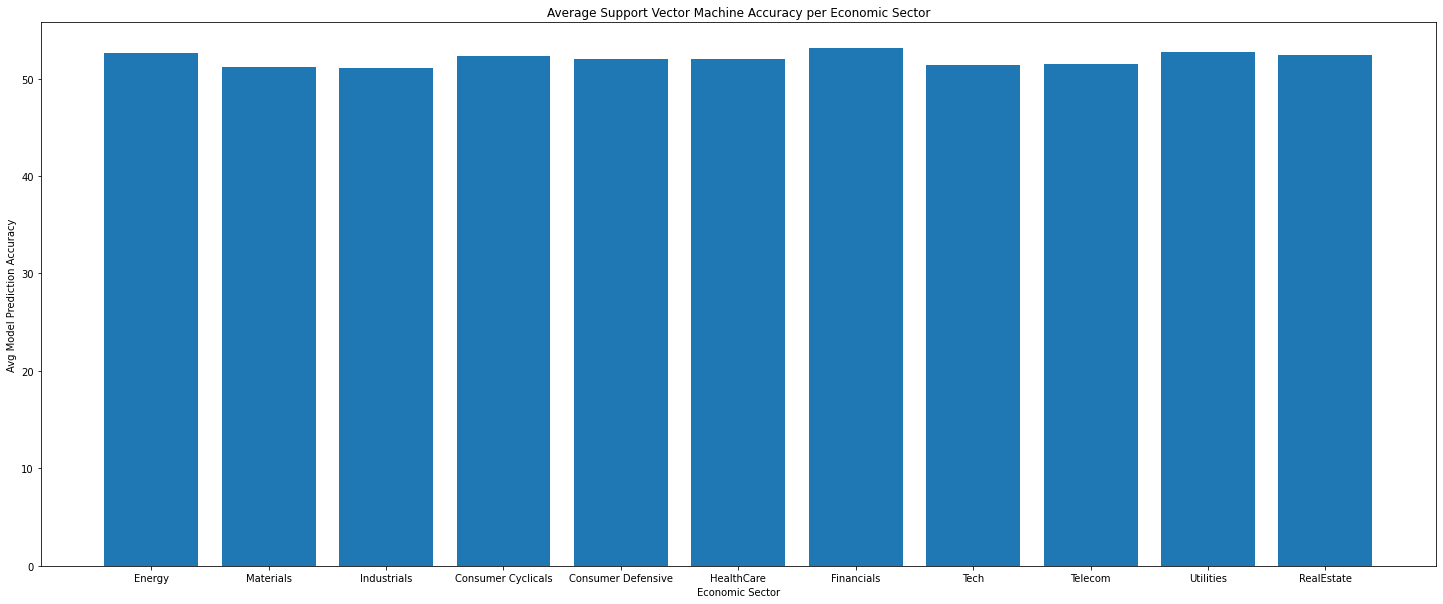

In [45]:
# Creating and Plotting the Bar Chart:
plt.figure(figsize=(25, 10))
plt.bar(svm_labels, svm_avg_accuracy)
plt.title("Average Support Vector Machine Accuracy per Economic Sector")
plt.xlabel("Economic Sector")
plt.ylabel("Avg Model Prediction Accuracy")
plt.show()

#### Random Forest Decision Tree:

In [17]:
# Importing ML model:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [18]:
# Creating a Feature Matrix (X) and a Response Vector (y):
aapl_X_discrete = aapl_dict["Discrete"][['10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI']] 
aapl_y_discrete = aapl_dict["Discrete"]["Close"]
cat_X_discrete = cat_dict["Discrete"][['10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI']]
cat_y_discrete = cat_dict["Discrete"]["Close"]

In [19]:
# Splitting the dataset into train-test:
aapl_dis_X_train, aapl_dis_X_test, aapl_dis_y_train, aapl_dis_y_test = train_test_split(aapl_X_discrete, aapl_y_discrete, test_size=0.5, random_state=1)
cat_dis_X_train, cat_dis_X_test, cat_dis_y_train, cat_dis_y_test = train_test_split(cat_X_discrete, cat_y_discrete, test_size=0.5, random_state=1)


In [20]:
# Creating the Random Forest Gaussian Classifier:
aapl_rf = RandomForestClassifier(n_estimators=100)
cat_rf = RandomForestClassifier(n_estimators=100)

In [21]:
# Training the RF Classifier:
aapl_rf.fit(aapl_dis_X_train, aapl_dis_y_train)
cat_rf.fit(cat_dis_X_train, cat_dis_y_train)

RandomForestClassifier()

In [22]:
# Testing the Accuracy of the model:
aapl_pred = aapl_rf.predict(aapl_dis_X_test) 
cat_pred = cat_rf.predict(cat_dis_X_test)

print("AAPL Discrete Gaussian Random Forest accuracy:", metrics.accuracy_score(aapl_dis_y_test, aapl_pred)*100)
print("CAT Discrete Gaussian Random Forest accuracy:", metrics.accuracy_score(cat_dis_y_test, cat_pred)*100)

AAPL Discrete Gaussian Random Forest accuracy: 49.77645305514158
CAT Discrete Gaussian Random Forest accuracy: 48.80774962742176


In [23]:
# Function that performs Random Forrest Classification given a ticker symbol:
def perform_RF_prediction(ticker):
    """
    - Method Takes a Ticker Symbol and performs the following logics:
    - Extract all the OHLC data for each ticker.
    - Perform data transformation on the OHLC ticker to get Discrete and Continuous data.
    - Split the data into the training and testing.
    - Train the Randomg Forrest Gaussian Model based on the train/test dataset.
    - Return the model object and the model accuracy.
    """
    # Extracting all OHLC data for the ticker:
    ohlc = yf.Ticker(ticker).history(period="max")
    
    # Performing data transformation on the OHLC dataframe:
    formatted_ohlc = ohlc_feature_extraction(ohlc)
    
    # Creating the Feature Matrix (X) and Response Vector (y):
    ohlc_X = formatted_ohlc["Discrete"][['10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI']]
    ohlc_y = formatted_ohlc["Discrete"]["Close"]
    
    # Creating a split between the train and testing data:
    ohlc_X_train, ohlc_X_test, ohlc_y_train, ohlc_y_test = train_test_split(ohlc_X, ohlc_y, test_size=0.5, random_state=1)
    
    # Creating the Random Forest Gaussian Classifier:
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(ohlc_X_train, ohlc_y_train)
    
    # Testing the accuracy of the model: 
    ohlc_pred = rfc.predict(ohlc_X_test)
    model_accuracy = metrics.accuracy_score(ohlc_y_test, ohlc_pred)*100
    
    #time.sleep(10)
    
    return {"Ticker":ticker, "Model": rfc, "Accuracy":model_accuracy}

### Testing the Accuracy of the Random Forrest Classifier across the economic sector:

In [24]:
# Creating main dataset: 
sector_RF_performance = {
    "Energy": [perform_RF_prediction(ticker) for ticker in energy_stocks],
    "Materials": [perform_RF_prediction(ticker) for ticker in materials_stocks],
    "Industrials": [perform_RF_prediction(ticker) for ticker in industrials_stocks],
    "Consumer Cyclicals": [perform_RF_prediction(ticker) for ticker in consumer_cyclical_stocks],
    "Consumer Defensive": [perform_RF_prediction(ticker) for ticker in consumer_defensive_stocks],
    "HealthCare": [perform_RF_prediction(ticker) for ticker in health_care_stocks],
    "Financials": [perform_RF_prediction(ticker) for ticker in financials_stocks],
    "Tech": [perform_RF_prediction(ticker) for ticker in tech_stocks],
    "Telecom": [perform_RF_prediction(ticker) for ticker in telecom_stocks],
    "Utilities": [perform_RF_prediction(ticker) for ticker in utilities_stocks],
    "RealEstate": [perform_RF_prediction(ticker) for ticker in real_estate_stocks]
}

<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying

<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying

<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying

<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying

<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-23-b73ff44e70d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

In [25]:
# Extracting just the Accuracy Variables:
sector_RF_performance_avg = {
    "Energy": [RF_dict["Accuracy"] for RF_dict in sector_RF_performance["Energy"]],
    "Materials": [RF_dict["Accuracy"] for RF_dict in sector_RF_performance["Materials"]],
    "Industrials": [RF_dict["Accuracy"] for RF_dict in sector_RF_performance["Industrials"]],
    "Consumer Cyclicals": [RF_dict["Accuracy"] for RF_dict in sector_RF_performance["Consumer Cyclicals"]],
    "Consumer Defensive": [RF_dict["Accuracy"] for RF_dict in sector_RF_performance["Consumer Defensive"]],
    "HealthCare": [RF_dict["Accuracy"] for RF_dict in sector_RF_performance["HealthCare"]],
    "Financials": [RF_dict["Accuracy"] for RF_dict in sector_RF_performance["Financials"]],
    "Tech": [RF_dict["Accuracy"] for RF_dict in sector_RF_performance["Tech"]],
    "Telecom": [RF_dict["Accuracy"] for RF_dict in sector_RF_performance["Telecom"]],
    "Utilities": [RF_dict["Accuracy"] for RF_dict in sector_RF_performance["Utilities"]],
    "RealEstate": [RF_dict["Accuracy"] for RF_dict in sector_RF_performance["RealEstate"]],
}

# Creating Bar Chart Data:
rf_labels = sector_RF_performance.keys()
rf_avg_accuracy = [sum(sector_lst) / len(sector_lst) for sector_lst in sector_RF_performance_avg.values()]

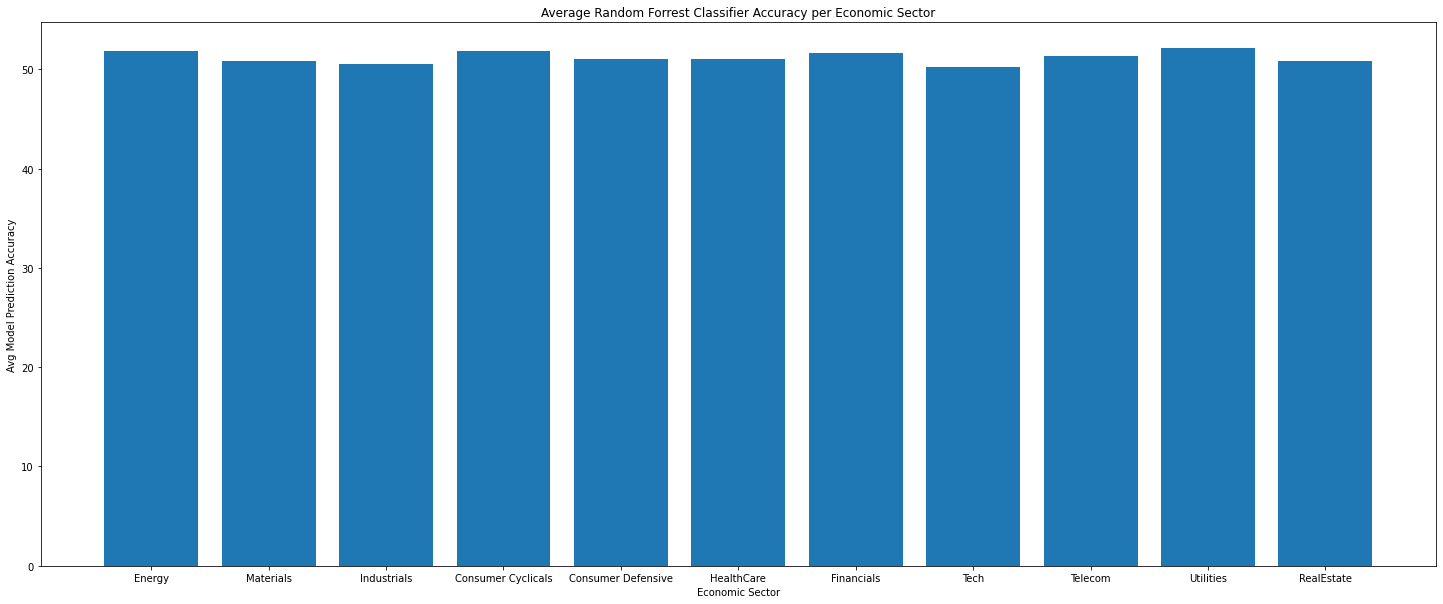

In [26]:
# Creating and Plotting the Bar Chart:
plt.figure(figsize=(25, 10))
plt.bar(rf_labels, rf_avg_accuracy)
plt.title("Average Random Forrest Classifier Accuracy per Economic Sector")
plt.xlabel("Economic Sector")
plt.ylabel("Avg Model Prediction Accuracy")
plt.show()

#### Naive-Bayes Classifier:

In [27]:
# Importing ML models:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [28]:
# Creating a Feature Matrix (X) and a Response Vector (y):
aapl_X_discrete = aapl_dict["Discrete"][['10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI']] 
aapl_y_discrete = aapl_dict["Discrete"]["Close"]
cat_X_discrete = cat_dict["Discrete"][['10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI']]
cat_y_discrete = cat_dict["Discrete"]["Close"]

# aapl_X_continuous = aapl_dict["Continuous"][['10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI']]
# aapl_y_continuous = aapl_dict["Continuous"]["Close"]
# cat_X_continuous = cat_dict["Continuous"][['10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI']]
# cat_y_continuous = cat_dict["Continuous"]["Close"]

In [29]:
# Creating the training and testing dataset:
# Discrete Train/Test:
aapl_dis_X_train, aapl_dis_X_test, aapl_dis_y_train, aapl_dis_y_test = train_test_split(aapl_X_discrete, aapl_y_discrete, test_size=0.5, random_state=1)
cat_dis_X_train, cat_dis_X_test, cat_dis_y_train, cat_dis_y_test = train_test_split(cat_X_discrete, cat_y_discrete, test_size=0.5, random_state=1)

# Continuous Train/Test:
# aapl_con_X_train, aapl_con_X_test, aapl_con_y_train, aapl_con_y_test = train_test_split(aapl_X_continuous, aapl_y_continuous, test_size=0.5, random_state=1)
# cat_con_X_train, cat_con_X_test, cat_con_y_train, cat_con_y_test = train_test_split(cat_X_continuous, cat_y_continuous, test_size=0.5, random_state=1)

In [30]:
# Creating the Naive Bayes Models:
aapl_dis_gnb = GaussianNB()
cat_dis_gnb = GaussianNB()


aapl_dis_gnb.fit(aapl_dis_X_train, aapl_dis_y_train)
cat_dis_gnb.fit(cat_dis_X_train, cat_dis_y_train)

GaussianNB()

In [31]:
# Testing predictive ability of the models:
aapl_dis_y_pred = aapl_dis_gnb.predict(aapl_dis_X_test)
cat_dis_y_pred = cat_dis_gnb.predict(cat_dis_X_test)

print("AAPL Discrete Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(aapl_dis_y_test, aapl_dis_y_pred)*100)
print("CAT Discrete Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(cat_dis_y_test, cat_dis_y_pred)*100)

AAPL Discrete Gaussian Naive Bayes model accuracy: 50.63338301043218
CAT Discrete Gaussian Naive Bayes model accuracy: 49.441132637853954


In [32]:
# Creating a function that performs a Naive Bayes Prediction model:
def perform_NB_prediction(ticker):
    """
    Method Takes a Ticker Symbol and performs the following logics:
    - Extract all the OHLC data for each ticker.
    - Perform data transformation on the OHLC ticker to get Discrete and Continuous data.
    - Split the data into the training and testing.
    - Train the NB Gaussian Model based on the train/test dataset.
    - Return the model object and the model accuracy.
    """
    # Extracting all OHLC data for the ticker:
    ohlc = yf.Ticker(ticker).history(period="max")
    
    # Performing data transformation on the OHLC dataframe:
    formatted_ohlc = ohlc_feature_extraction(ohlc)
    
    # Creating the Feature Matrix (X) and Response Vector (y):
    ohlc_X = formatted_ohlc["Discrete"][['10SMA', '10WMA', 'Momentum', '%K', '%D', 'RSI', 'MACD', 'R%', 'ADOSC', 'CCI']]
    ohlc_y = formatted_ohlc["Discrete"]["Close"]
    
    # Creating a split between the train and testing data:
    ohlc_X_train, ohlc_X_test, ohlc_y_train, ohlc_y_test = train_test_split(ohlc_X, ohlc_y, test_size=0.5, random_state=1)
   
    # Creating and training Naive Bayes Model:
    gnb = GaussianNB()
    gnb.fit(ohlc_X_train, ohlc_y_train)
    
    # Testing the accuracy of the model: 
    ohlc_pred = gnb.predict(ohlc_X_test)
    model_accuracy = metrics.accuracy_score(ohlc_y_test, ohlc_pred)*100
    
    #time.sleep(10)
    
    return {"Ticker":ticker, "Model": gnb, "Accuracy":model_accuracy}

### This accuracy is not congruent to the paper, why?
The paper puts the predictive power of the Naive Bayes model at around 90.19% whereas the model here show an accuracy of ~50%. There are two main reasons that this may be the case:

1) The model in the paper is attempting to use the feature matrix to predict the movement of the price on that day vs the next day. This is most likely a mistake by me in interpreting the paper. Essentally what I have done here is provide a feature set and given said feature set predict the probability that the current closing price  will be higher or lower than the closing price the next day. It is possible that the model in the paper is attempting to predict if the current price is higher or lower than the previous day's price.

2) Assuming that this is not a massive misreading of the paper by me, **WHICH IS MOST LIKELY THE CASE** then the high accuracy of the NB classifier is due to the fact that the model actual has no predictive power. This is because, essentally we are attempting to predict the closing price (the response vector) based on a feature set of technical indicators from the current day, which are all derived from said current closing price either way. This means that in order to have the feature set of technical indicators to input into the model, those indicators need to be derived from the Closing price, which would be the output of the model. This is why the model has such a high accuracy. This would also explain why, when changing the model to predict if a price is higher or lower than tomorrow's price (uncoupling the response vector from the feature set and giving it predictive power) that the accuracy of the model drops to ~50%.  


### Does this accuracy vary between specific stock types?
We should test the accuracy of the NB classifier in predicting price movements of other types of stocks across various sectors:

**TODO**: Split the SPY into the following buisness sectors and perform NB classification/prediction to assess accuracy for each sector:

    Energy
    Materials
    Industrials
    Consumer Discretionary/Cyclical
    Consumer Staples/Defensive
    Health Care
    Financials
    Information Technology
    Telecommunication Services
    Utilities
    Real Estate

In [33]:
# Creating main dataset: 
sector_NB_performance = {
    "Energy": [perform_NB_prediction(ticker) for ticker in energy_stocks],
    "Materials": [perform_NB_prediction(ticker) for ticker in materials_stocks],
    "Industrials": [perform_NB_prediction(ticker) for ticker in industrials_stocks],
    "Consumer Cyclicals": [perform_NB_prediction(ticker) for ticker in consumer_cyclical_stocks],
    "Consumer Defensive": [perform_NB_prediction(ticker) for ticker in consumer_defensive_stocks],
    "HealthCare": [perform_NB_prediction(ticker) for ticker in health_care_stocks],
    "Financials": [perform_NB_prediction(ticker) for ticker in financials_stocks],
    "Tech": [perform_NB_prediction(ticker) for ticker in tech_stocks],
    "Telecom": [perform_NB_prediction(ticker) for ticker in telecom_stocks],
    "Utilities": [perform_NB_prediction(ticker) for ticker in utilities_stocks],
    "RealEstate": [perform_NB_prediction(ticker) for ticker in real_estate_stocks]
}

<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying

<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying

<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying

<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying

<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df.dropna(inplace=True)
<ipython-input-32-d0af7f80304e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_ohlc = ohlc_feature_extraction(ohlc)
<ipython-input-10-6eade4727298>:218: SettingWithCopyWarning: 
A v

In [34]:
# Extracting just the Accuracy Variables:
sector_NB_performance_avg = {
    "Energy": [NB_dict["Accuracy"] for NB_dict in sector_NB_performance["Energy"]],
    "Materials": [NB_dict["Accuracy"] for NB_dict in sector_NB_performance["Materials"]],
    "Industrials": [NB_dict["Accuracy"] for NB_dict in sector_NB_performance["Industrials"]],
    "Consumer Cyclicals": [NB_dict["Accuracy"] for NB_dict in sector_NB_performance["Consumer Cyclicals"]],
    "Consumer Defensive": [NB_dict["Accuracy"] for NB_dict in sector_NB_performance["Consumer Defensive"]],
    "HealthCare": [NB_dict["Accuracy"] for NB_dict in sector_NB_performance["HealthCare"]],
    "Financials": [NB_dict["Accuracy"] for NB_dict in sector_NB_performance["Financials"]],
    "Tech": [NB_dict["Accuracy"] for NB_dict in sector_NB_performance["Tech"]],
    "Telecom": [NB_dict["Accuracy"] for NB_dict in sector_NB_performance["Telecom"]],
    "Utilities": [NB_dict["Accuracy"] for NB_dict in sector_NB_performance["Utilities"]],
    "RealEstate": [NB_dict["Accuracy"] for NB_dict in sector_NB_performance["RealEstate"]],
}

# Creating Bar Chart Data:
labels = sector_NB_performance.keys()
avg_accuracy = [sum(sector_lst) / len(sector_lst) for sector_lst in sector_NB_performance_avg.values()]

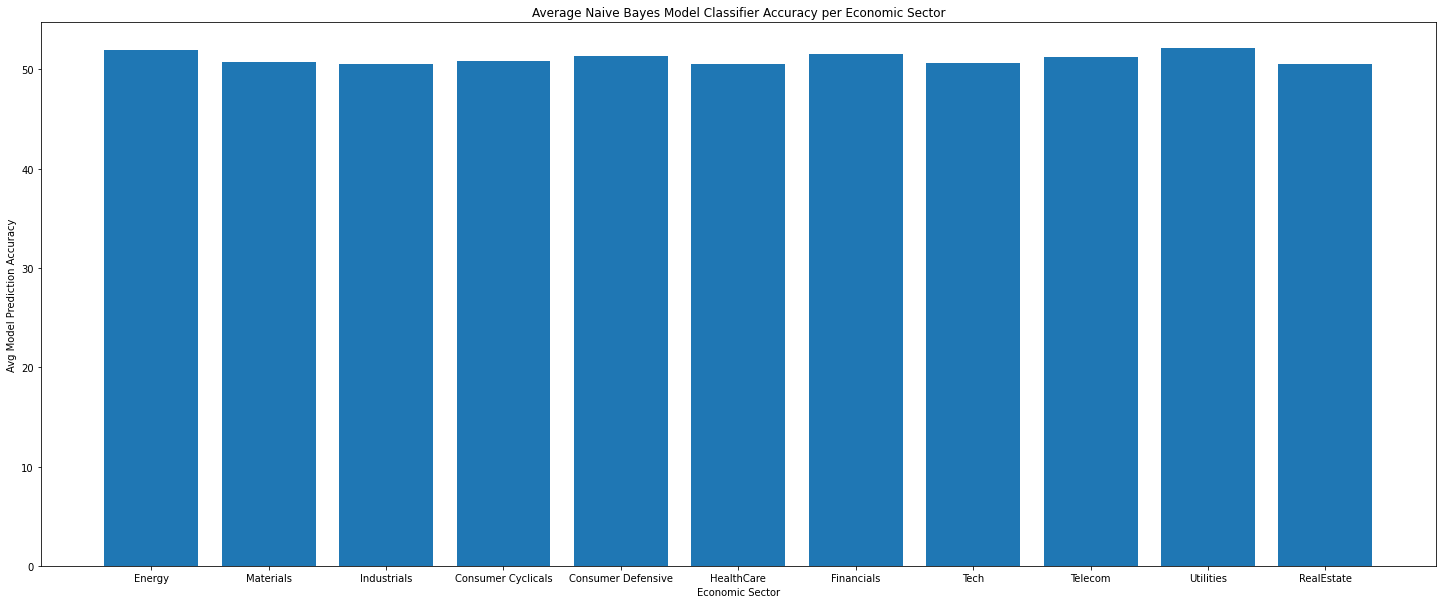

In [35]:
# Creating and Plotting the Bar Chart:
plt.figure(figsize=(25, 10))
plt.bar(labels, avg_accuracy)
plt.title("Average Naive Bayes Model Classifier Accuracy per Economic Sector")
plt.xlabel("Economic Sector")
plt.ylabel("Avg Model Prediction Accuracy")
plt.show()